In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import random


In [2]:
claim_frequecy_df= pd.read_csv("C:\\Users\\abhinav.g.raj\\Desktop\\Insurance claim Modelling\\claim_frequency.csv")
claim_frequecy_df

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region
0,1.0,1,0.10,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes
1,3.0,1,0.77,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes
2,5.0,1,0.75,6,2,52,50,B12,Diesel,B,54,Picardie
3,10.0,1,0.09,7,0,46,50,B12,Diesel,B,76,Aquitaine
4,11.0,1,0.84,7,0,46,50,B12,Diesel,B,76,Aquitaine
...,...,...,...,...,...,...,...,...,...,...,...,...
431815,3150823.0,0,0.41,7,13,47,90,B1,Regular,C,106,Centre
431816,3150824.0,0,0.34,9,13,47,80,B1,Regular,C,106,Centre
431817,3150826.0,1,0.17,5,9,49,50,B2,Diesel,C,170,Centre
431818,3150829.0,0,0.23,6,8,54,50,B1,Diesel,C,170,Centre


In [3]:
claim_frequecy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431820 entries, 0 to 431819
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       431819 non-null  float64
 1   ClaimNb     431820 non-null  int64  
 2   Exposure    431820 non-null  float64
 3   VehPower    431820 non-null  int64  
 4   VehAge      431820 non-null  int64  
 5   DrivAge     431820 non-null  int64  
 6   BonusMalus  431820 non-null  int64  
 7   VehBrand    431820 non-null  object 
 8   VehGas      431820 non-null  object 
 9   Area        431820 non-null  object 
 10  Density     431820 non-null  int64  
 11  Region      431820 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 39.5+ MB


In [4]:
claim_frequecy_df.describe()


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,4.318190e+05,431820.000000,431820.000000,431820.000000,431820.000000,431820.000000,431820.000000,431820.000000
mean,1.627922e+06,0.065896,0.562554,6.401867,7.454740,44.901728,59.845829,1658.911482
std,1.008741e+06,0.264692,0.367901,1.968157,5.690885,14.042170,15.589712,3644.754151
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,2.000000
25%,1.036768e+06,0.000000,0.210000,5.000000,3.000000,34.000000,50.000000,91.000000
50%,2.037241e+06,0.000000,0.520000,6.000000,7.000000,44.000000,50.000000,374.000000
75%,2.257010e+06,0.000000,1.000000,7.000000,12.000000,54.000000,66.000000,1541.000000
max,3.150830e+06,16.000000,2.010000,15.000000,100.000000,99.000000,230.000000,27000.000000


In [5]:
claim_frequecy_df.isnull().sum()

IDpol         1
ClaimNb       0
Exposure      0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Area          0
Density       0
Region        0
dtype: int64

<Axes: >

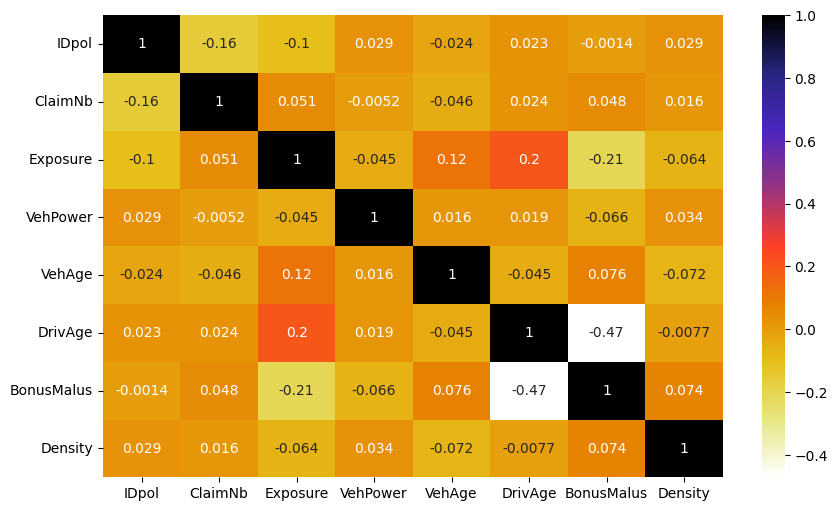

In [6]:
# See correlation between Features

df = claim_frequecy_df.select_dtypes(include=["number"])
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.CMRmap_r)

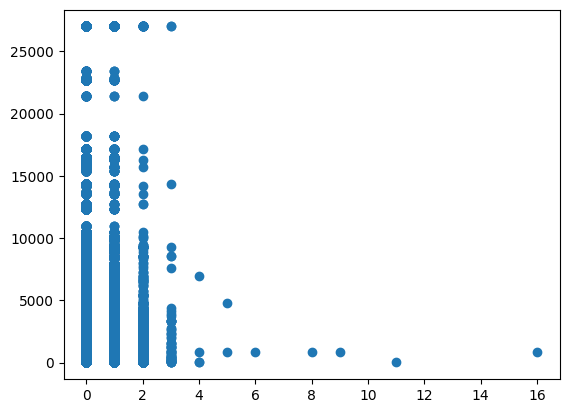

In [7]:
plt.scatter(x= df['ClaimNb'], y= df['Density'])
plt.show()

<Axes: xlabel='Exposure', ylabel='Count'>

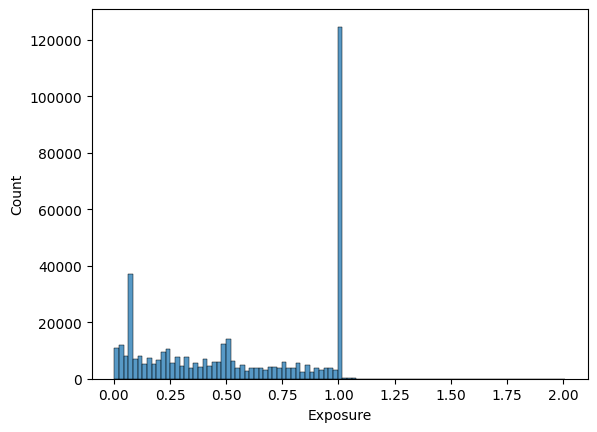

In [8]:

# sns.histplot(df['DrivAge'])
# sns.histplot(df['VehPower'])
sns.histplot(df['Exposure'])



In [9]:

# See unique count of records
claim_frequecy_df['IDpol'].nunique()   #in output we can see that count of unique value is 678012 and Total count is 678013. So we can assume that all values are unique


431819

# Univariate Analysis

array([[<Axes: title={'center': 'Exposure'}>,
        <Axes: title={'center': 'VehPower'}>],
       [<Axes: title={'center': 'VehAge'}>,
        <Axes: title={'center': 'DrivAge'}>],
       [<Axes: title={'center': 'BonusMalus'}>,
        <Axes: title={'center': 'Density'}>]], dtype=object)

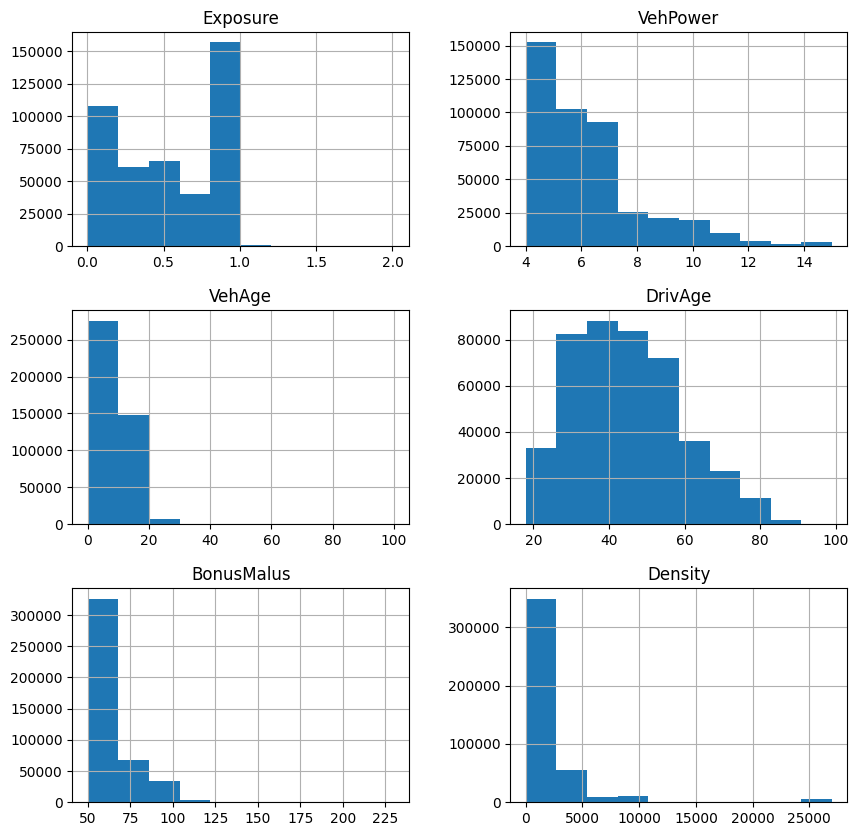

In [10]:
columns_to_include= ['Exposure','VehPower','VehAge','DrivAge','BonusMalus','Density']
claim_frequecy_df[columns_to_include].hist(figsize=(10,10))

In [11]:
#this one is a new dataset "Claim Severity"
claim_severity_df= pd.read_csv("C:\\Users\\abhinav.g.raj\\Desktop\\Insurance claim Modelling\\claim_severity.csv")
claim_severity_df

,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11
3,4007252,1204.00
4,4046424,1204.00
...,...,...
26634,3254353,1200.00
26635,3254353,1800.00
26636,3254353,1000.00
26637,2222064,767.55


In [12]:
claim_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  int64  
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 416.4 KB


In [16]:
# claim_frequecy_df[claim_frequecy_df['ClaimNb']==0].shape
claim_severity_df.shape


(26639, 2)

In [17]:
claim_severity_grouped_df = claim_severity_df.groupby(['IDpol'])['ClaimAmount'].sum().reset_index()  
# joined_df['ClaimAmount'].describe()
# joined_df[joined_df['ClaimAmount']>0].shape[0]

In [18]:
joined_df = pd.merge(claim_frequecy_df, claim_severity_grouped_df, how='left' , on='IDpol')   
joined_df['ClaimAmount'] = joined_df['ClaimAmount'].fillna(0)
joined_df

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount
0,1.0,1,0.10,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.00
1,3.0,1,0.77,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.00
2,5.0,1,0.75,6,2,52,50,B12,Diesel,B,54,Picardie,0.00
3,10.0,1,0.09,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.00
4,11.0,1,0.84,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431815,3150823.0,0,0.41,7,13,47,90,B1,Regular,C,106,Centre,0.00
431816,3150824.0,0,0.34,9,13,47,80,B1,Regular,C,106,Centre,0.00
431817,3150826.0,1,0.17,5,9,49,50,B2,Diesel,C,170,Centre,78.16
431818,3150829.0,0,0.23,6,8,54,50,B1,Diesel,C,170,Centre,0.00


In [19]:
joined_df['Exposure'] =joined_df['Exposure'].apply(lambda x: 1 if x>1 else x)  # capping exposure to 1 
joined_df['ClaimNb'] =joined_df['ClaimNb'].apply(lambda x: 4 if x>4 else x)   # capping ClaimNb to 1
joined_df['ClaimNb']= np.where(joined_df['ClaimAmount']==0,0, joined_df['ClaimNb'])  # when ClaimAmount ==0, then ClaimNb shall also be 0 :>


## Now let's apply preprocessing on train Data. We will remove outliers, create bins, and tokenize using only the train set and not the test set: to prevent data leakage(Data leakage happens when information from outside the training dataset is used to create the model in a way that gives it an unfair advantage) and ensure our model generalizes well to unseen data.

In [20]:
# train_df['VehAge'] =train_df['VehAge'].apply(lambda x: 20 if x>20 else x)  # Cap VehAge to 20 ma
joined_df['DrivAge'] =joined_df['DrivAge'].apply(lambda x: 18 if x<18 else ( 90 if x>90 else x))  # if DrivAge is<18 then set it to 18. If DrivAge>90 set it to 90. Else keep as it is
# print(train_df['DrivAge'].max())
# print(train_df['DrivAge'].min())
joined_df.reset_index()
#train_df[train_df['ClaimNb']>4]


,index,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount
0,0,1.0,0,0.10,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.00
1,1,3.0,0,0.77,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.00
2,2,5.0,0,0.75,6,2,52,50,B12,Diesel,B,54,Picardie,0.00
3,3,10.0,0,0.09,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.00
4,4,11.0,0,0.84,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431815,431815,3150823.0,0,0.41,7,13,47,90,B1,Regular,C,106,Centre,0.00
431816,431816,3150824.0,0,0.34,9,13,47,80,B1,Regular,C,106,Centre,0.00
431817,431817,3150826.0,1,0.17,5,9,49,50,B2,Diesel,C,170,Centre,78.16
431818,431818,3150829.0,0,0.23,6,8,54,50,B1,Diesel,C,170,Centre,0.00


Bonus-Malus is french terms for No Claim Bonus.
How Bonus-Malus Works:
Insurers assign each driver a Bonus-Malus Score (BMS).
It typically starts at 100% (neutral level) and adjusts yearly based on the driver’s history.
If you don’t claim, the score reduces (e.g., 90%, 80%), lowering your premium.
If you file a claim, the score increases (e.g., 110%, 130%), raising your premium.
Example:

Year	Claims?	Bonus-Malus Score	Effect on Premium
2023	No	    90%	                10% discount
2024	No	    80%	                20% discount
2025	Yes	    110%                10% increase

In [21]:
#Lets Handle Bonus-Malus: cap max value to 150, create Binning and setting
# QUESTION: why Binning is important? ANS: Binning simplifies data by turning continuous variables into categories, reducing noise, preventing overfitting, and making models easier to understand. It works well with skewed data and models like Decision Trees.
joined_df['BonusMalus'] = joined_df['BonusMalus'].apply(lambda x: 150 if x>150 else x)  # cap max(Bonus_malus) to 150
bin_size=10
joined_df['BonusMalusBin']= joined_df['BonusMalus'].apply(lambda x: x -  x % bin_size)  
# train_df['BonusMalus'].max()  #output is 150


In [22]:
#density refers to the density of the area where the policyholder is located.  Lets Handle "Density": we will create log(Density), create Bin of log(density) i.e. if log(Density)==2.354 then we will Bin it as 2:3, tokenazie it and keep LogDensityBin0
joined_df['LogDensity'] = np.log(joined_df['Density'])
joined_df['LogDensityBin'] = joined_df['LogDensity'].astype(int)
joined_df #this steps removes decimal value from "LogDensity" column and takes integer part 
joined_df.head()


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount,BonusMalusBin,LogDensity,LogDensityBin
0,1.0,0,0.10,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0,50,7.104144,7
1,3.0,0,0.77,5,0,55,50,B12,Regular,D,1217,Rhone-Alpes,0.0,50,7.104144,7
2,5.0,0,0.75,6,2,52,50,B12,Diesel,B,54,Picardie,0.0,50,3.988984,3
3,10.0,0,0.09,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0,50,4.330733,4
4,11.0,0,0.84,7,0,46,50,B12,Diesel,B,76,Aquitaine,0.0,50,4.330733,4


In [23]:

# let's do train-test split
from sklearn.model_selection import train_test_split
train_df, test_df= train_test_split(joined_df, test_size=0.1, random_state=42)


In [24]:
# ****************************************************Lets Predict Claim Frequency ********************************************************************************************************
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula_claim_frequency = "ClaimNb~ Exposure+ VehPower+ VehAge+ DrivAge+ Density+ BonusMalusBin+ LogDensityBin+ C(VehGas)+ C(Area)+ C(Region)"
claim_frequency_glm_model= smf.glm(formula=formula_claim_frequency, data= train_df, family= sm.families.Poisson()).fit()
# print(claim_frequency_glm_model.summary())
frequency_scored = test_df.drop(columns=['ClaimNb'])
frequency_scored['ClaimNbPrediction'] = claim_frequency_glm_model.predict(test_df)
frequency_scored


,IDpol,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimAmount,BonusMalusBin,LogDensity,LogDensityBin,ClaimNbPrediction
263395,2126430.0,1.00,5,9,38,55,B2,Regular,A,7,Languedoc-Roussillon,1172.0,50,1.945910,1,0.028616
360394,3008112.0,0.57,11,6,53,50,B12,Regular,C,346,Nord-Pas-de-Calais,0.0,50,5.846439,5,0.028165
296823,2204131.0,0.80,10,13,64,50,B2,Diesel,E,2044,Centre,0.0,50,7.622664,7,0.060437
198985,1198986.0,1.00,5,1,75,50,B1,Diesel,D,1247,Midi-Pyrenees,0.0,50,7.128496,7,0.056101
319529,2231356.0,0.08,6,11,32,76,B2,Diesel,D,893,Rhone-Alpes,0.0,70,6.794587,6,0.031376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406744,3100036.0,0.32,5,14,24,125,B2,Regular,E,2715,Centre,0.0,120,7.906547,7,0.106515
25744,54734.0,0.68,7,11,33,60,B2,Regular,A,46,Centre,0.0,60,3.828641,3,0.031076
318190,2230017.0,0.08,7,8,65,50,B2,Regular,D,1326,Provence-Alpes-Cote-D'Azur,0.0,50,7.189922,7,0.017855
178284,1177697.0,1.00,7,5,73,50,B5,Regular,D,575,Bretagne,0.0,50,6.354370,6,0.065444


In [25]:
#************************************************Lets predict Claim Severity ********************************
#      for that we need to prepare "severity_to_score" dataset
severity_to_score = frequency_scored.rename(columns={'ClaimNbPrediction': 'ClaimNb'})
severity_to_score

severity_scored= test_df.drop(columns=['ClaimAmount'])

claim_severity_analysis= train_df[train_df['ClaimNb']>0]
formula_claim_severity= "ClaimAmount ~ ClaimNb+Exposure+VehPower+VehAge+DrivAge+BonusMalusBin+LogDensityBin+ C(VehBrand)+C(VehGas)+C(Area)+ C(Region)"
claim_severity_glm_model= smf.glm(formula=formula_claim_severity, data= claim_severity_analysis, family=sm.families.Poisson()).fit()
severity_scored['ClaimAmountPrediction'] = claim_severity_glm_model.predict(severity_to_score)
severity_scored


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,BonusMalusBin,LogDensity,LogDensityBin,ClaimAmountPrediction
263395,2126430.0,1,1.00,5,9,38,55,B2,Regular,A,7,Languedoc-Roussillon,50,1.945910,1,580.930054
360394,3008112.0,0,0.57,11,6,53,50,B12,Regular,C,346,Nord-Pas-de-Calais,50,5.846439,5,952.533953
296823,2204131.0,0,0.80,10,13,64,50,B2,Diesel,E,2044,Centre,50,7.622664,7,1206.702958
198985,1198986.0,0,1.00,5,1,75,50,B1,Diesel,D,1247,Midi-Pyrenees,50,7.128496,7,185.649763
319529,2231356.0,0,0.08,6,11,32,76,B2,Diesel,D,893,Rhone-Alpes,70,6.794587,6,2355.216134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406744,3100036.0,0,0.32,5,14,24,125,B2,Regular,E,2715,Centre,120,7.906547,7,5413.461872
25744,54734.0,0,0.68,7,11,33,60,B2,Regular,A,46,Centre,60,3.828641,3,2208.121137
318190,2230017.0,0,0.08,7,8,65,50,B2,Regular,D,1326,Provence-Alpes-Cote-D'Azur,50,7.189922,7,2143.456188
178284,1177697.0,0,1.00,7,5,73,50,B5,Regular,D,575,Bretagne,50,6.354370,6,368.881763


In [26]:
# ***************************************Now Lets Calculate pure premium directly**********************************************
pure_premium_scored = test_df.drop(columns=['ClaimAmount'])

formula_pure_premium= "ClaimAmount ~ ClaimNb+ Exposure+VehPower+VehAge+DrivAge+BonusMalusBin+LogDensityBin+ C(VehBrand)+ C(VehGas)+ C(Area)+ C(Region)"
pure_premium_glm_model= smf.glm(formula=formula_pure_premium, data= train_df, family=sm.families.Poisson()).fit()
pure_premium_scored['PurePremiumPrediction']= pure_premium_glm_model.predict(pure_premium_scored)
pure_premium_scored



,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,BonusMalusBin,LogDensity,LogDensityBin,PurePremiumPrediction
263395,2126430.0,1,1.00,5,9,38,55,B2,Regular,A,7,Languedoc-Roussillon,50,1.945910,1,85.102874
360394,3008112.0,0,0.57,11,6,53,50,B12,Regular,C,346,Nord-Pas-de-Calais,50,5.846439,5,40.030260
296823,2204131.0,0,0.80,10,13,64,50,B2,Diesel,E,2044,Centre,50,7.622664,7,56.943919
198985,1198986.0,0,1.00,5,1,75,50,B1,Diesel,D,1247,Midi-Pyrenees,50,7.128496,7,5.897633
319529,2231356.0,0,0.08,6,11,32,76,B2,Diesel,D,893,Rhone-Alpes,70,6.794587,6,89.233244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406744,3100036.0,0,0.32,5,14,24,125,B2,Regular,E,2715,Centre,120,7.906547,7,237.774621
25744,54734.0,0,0.68,7,11,33,60,B2,Regular,A,46,Centre,60,3.828641,3,111.919242
318190,2230017.0,0,0.08,7,8,65,50,B2,Regular,D,1326,Provence-Alpes-Cote-D'Azur,50,7.189922,7,60.317825
178284,1177697.0,0,1.00,7,5,73,50,B5,Regular,D,575,Bretagne,50,6.354370,6,19.443680


In [27]:
# ********************************MODEL COMPARISON*****************************
# JOin three datasets and calculate premium from:::::::::::  frequency_scored['ClaimNbPrediction']*severity_scored['ClaimAmountPrediction']. Now compare with pure_premium_scored['PurePremiumPrediction']

severity_scored_to_merge=  severity_scored.drop(columns=[col for col in severity_scored.columns if col not in ['IDpol','ClaimAmountPrediction'] ])
pure_premium_scored_to_merge= pure_premium_scored[['IDpol', 'PurePremiumPrediction']]


model_comparison_df = pd.merge(frequency_scored,severity_scored_to_merge,how='left',on='IDpol')
model_comparison_df= pd.merge(model_comparison_df,pure_premium_scored_to_merge, how='left', on='IDpol')

model_comparison_df['PremiumPredictionCompound']= model_comparison_df['ClaimNbPrediction'] * model_comparison_df['ClaimAmountPrediction']
# model_comparison_df

In [ ]:
model_comparison_prepared_df= model_comparison_df

def lorenz_curve(y_true, y_pred, exposure):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    exposure = np.asarray(exposure)

    # order samples by increasing predicted risk:
    ranking = np.argsort(y_pred)
    # print(ranking) 
    ranked_exposure = exposure[ranking]
    # print(exposure[ranking])
    ranked_pure_premium = y_true[ranking]
    cumulated_claim_amount = np.cumsum(ranked_pure_premium * ranked_exposure)
    cumulated_claim_amount /= cumulated_claim_amount[-1]
    cumulated_samples = np.linspace(0, 1, len(cumulated_claim_amount))
    print("Over ")
    return cumulated_samples, cumulated_claim_amount

tweedie_cum_samples, tweedie_cum_claim_amount = lorenz_curve(model_comparison_prepared_df['ClaimAmount'],model_comparison_prepared_df['PurePremiumPrediction'],model_comparison_prepared_df['Exposure'])
product_cum_samples, product_cum_claim_amount = lorenz_curve(model_comparison_prepared_df['ClaimAmount'],model_comparison_prepared_df['PremiumPredictionCompound'],model_comparison_prepared_df['Exposure'])
oracle_cum_samples, oracle_cum_claim_amount = lorenz_curve(model_comparison_prepared_df['ClaimAmount'], model_comparison_prepared_df['ClaimAmount'],model_comparison_prepared_df['Exposure'])
ordered_array = [x for x in range(len(model_comparison_prepared_df))]
random.shuffle(ordered_array)
random_cum_samples, random_cum_claim_amount = lorenz_curve(model_comparison_prepared_df['ClaimAmount'], ordered_array, model_comparison_prepared_df['Exposure'])


lorenz_curves_df = pd.DataFrame(data={'cum_samples': tweedie_cum_samples, 'product_cum_claim_amount': product_cum_claim_amount, 'tweedie_cum_claim_amount': tweedie_cum_claim_amount,'oracle_cum_claim_amount': oracle_cum_claim_amount,'random_cum_claim_amount': random_cum_claim_amount})

# model_comparison_prepared_df

Over 
Over 
Over 
Over 


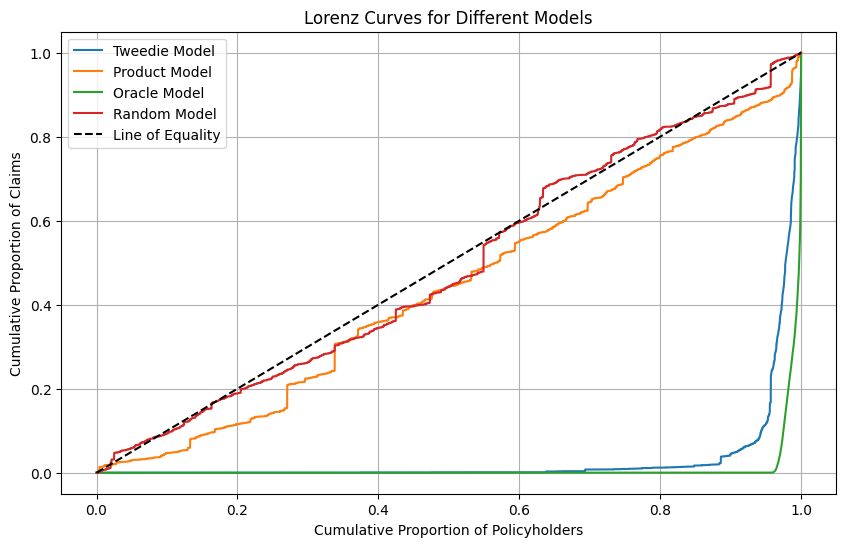

In [31]:
import matplotlib.pyplot as plt

# Plotting the Lorenz curves
plt.figure(figsize=(10, 6))

plt.plot(tweedie_cum_samples, tweedie_cum_claim_amount, label='Tweedie Model')
plt.plot(product_cum_samples, product_cum_claim_amount, label='Product Model')
plt.plot(oracle_cum_samples, oracle_cum_claim_amount, label='Oracle Model')
plt.plot(random_cum_samples, random_cum_claim_amount, label='Random Model')

# Adding the line of equality
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Line of Equality')

plt.xlabel('Cumulative Proportion of Policyholders')
plt.ylabel('Cumulative Proportion of Claims')
plt.title('Lorenz Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()